# Breast Cancer Diagnostic :
<br>

### Attribute Information:

<ol>
    
   
   <li> 'mean_radius' </li>
   <br>
   <li> 'mean_texture' </li>
   <br>
   <li> 'mean_perimeter' </li>
   <br>
   <li> 'mean_area' </li>
   <br>
   <li> 'mean_smoothness' </li>
   <br>
   <li> 'diagnosis' : {0: 'Not Cancer', 1: 'Cancer'} </li>
   <br>

</ol>

### Objevtives :

* To Analyze the data for insights. 

* To Build a roboust Machine Learning Model for diagnosis of a patient based on his medical test reports.

<img src='cancer_image.jpg'>

* Importing the essential libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the dataset into a pandas Dataframe object

cancer = pd.read_csv('Breast_cancer_data.csv')

In [3]:
# Checking the head of the dataste

cancer.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


In [4]:
# General info. about the dataset

cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [5]:
# Statistical information of the dataset

cancer.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


* ### Exploratory Data Analysis

In [6]:
# Setting the plotting style of seaborn

sns.set_style(style = 'whitegrid')

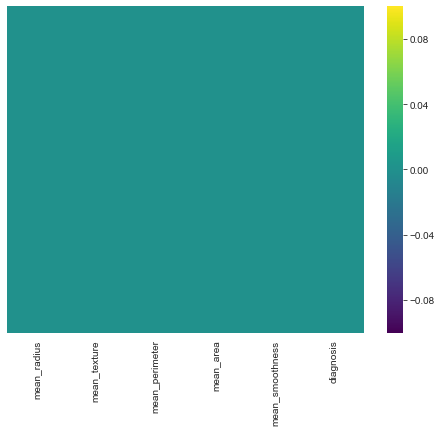

In [7]:
# Checking if null vaues are present in the dataset.ie. if data is missing

plt.figure( figsize = (8,6))

sns.heatmap( data = cancer.isnull() , yticklabels = False , cmap = 'viridis' )

* So here we can see that there is no missing values in our dataset.

In [8]:
# Calculating the co-relation coefficient matrix or similarity matrix

cancer.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


(6.0, 0.0)

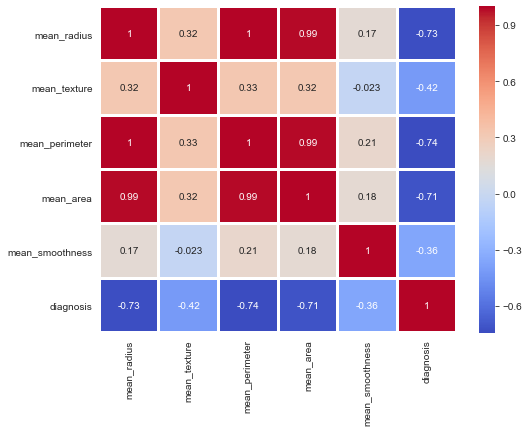

In [9]:
# Plotting heatmap of the similarity matrix

plt.figure( figsize = (8 , 6))

ax = sns.heatmap( data = cancer.corr() ,lw = 2, cmap = 'coolwarm' , annot = True)

bottom , top = ax.get_ylim()

ax.set_ylim(bottom+0.5 , top-0.5)

* Here we can see that three features - 
<ol>
    <li> mean_radius </li>
    
    <li> mean_perimeter </li>
    
    <li> mean_area </li>
    <br>
</ol>

are very highly correlated. It is normal as the pierimeter and area of a circle is derived from its radius. So we can use one these three features in training our model.

* ### Monovariate analysis

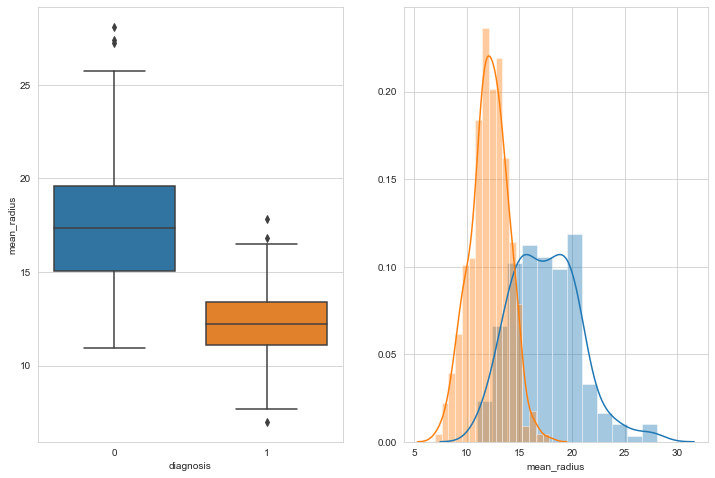

In [10]:
#Box plot and distribution plot of the feature 'mean_radius'
f , (ax_box , ax_dist) = plt.subplots(nrows = 1 , ncols = 2 , figsize = (12 , 8))

sns.boxplot( data = cancer , x = 'diagnosis' , y = 'mean_radius' , ax = ax_box)

sns.distplot( cancer[cancer['diagnosis'] == 0]['mean_radius'] , ax = ax_dist)

sns.distplot( cancer[cancer['diagnosis'] == 1]['mean_radius'] , ax = ax_dist)

* The feature 'mean_radius' is well seperated for the two classes. This is a very usegul feature. 'mean_radius' of malignant tumors are lower than the benign tumors.

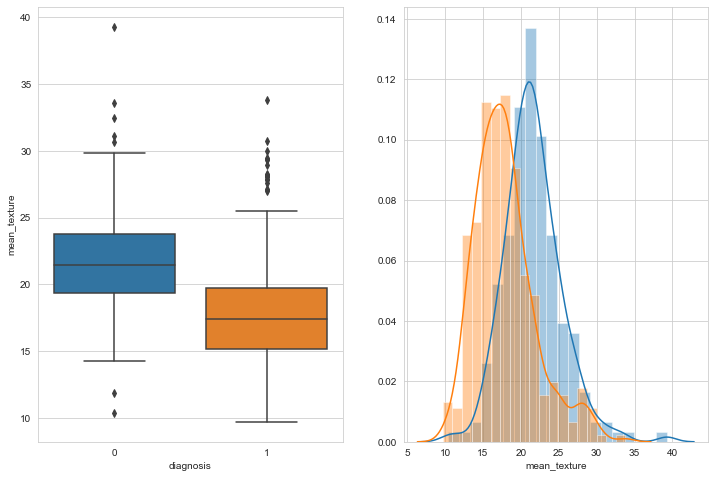

In [11]:
#Box plot and distribution plot of the feature 'mean_texture'
f , (ax_box , ax_dist) = plt.subplots(nrows = 1 , ncols = 2 , figsize = (12 , 8))

sns.boxplot( data = cancer , x = 'diagnosis' , y = 'mean_texture' , ax = ax_box)

sns.distplot( cancer[cancer['diagnosis'] == 0]['mean_texture'] , ax = ax_dist)

sns.distplot( cancer[cancer['diagnosis'] == 1]['mean_texture'] , ax = ax_dist)

* This feature also seperates the dataset into two groups well. The 'mean_texture' is lower for the malignant ones.

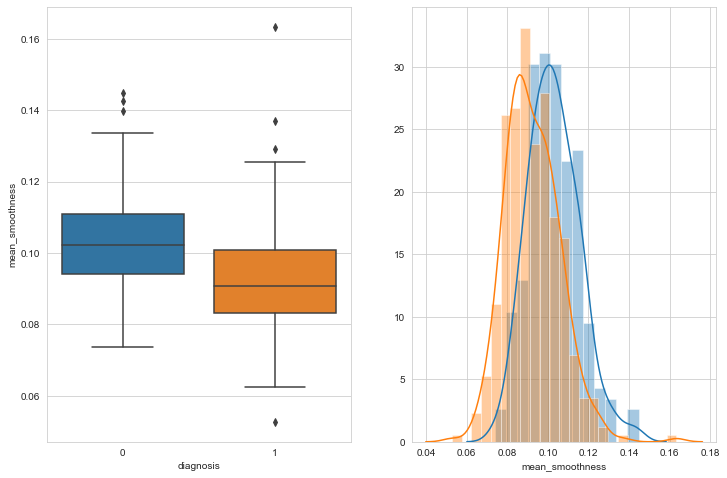

In [12]:
#Box plot and distribution plot of the feature 'mean_smoothness'
f , (ax_box , ax_dist) = plt.subplots(nrows = 1 , ncols = 2 , figsize = (12 , 8))

sns.boxplot( data = cancer , x = 'diagnosis' , y = 'mean_smoothness' , ax = ax_box)

sns.distplot( cancer[cancer['diagnosis'] == 0]['mean_smoothness'] , ax = ax_dist)

sns.distplot( cancer[cancer['diagnosis'] == 1]['mean_smoothness'] , ax = ax_dist)

### Bi-variate Analysis



In [ ]:
sns.pairplot(data = cancer.iloc[:,:] , hue = 'diagnosis')

C:\Users\Paritosh Majumder\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Paritosh Majumder\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [ ]:
# scatterplot mean_radius vs. mean_texture

plt.figure(figsize = (8,6))

sns.scatterplot(data = cancer , x = 'mean_radius' , y='mean_texture' , hue = 'diagnosis')

In [ ]:
# scatterplot mean_radius vs. mean_texture

plt.figure(figsize = (8,6))

sns.scatterplot(data = cancer , x = 'mean_radius' , y='mean_smoothness' , hue = 'diagnosis')

In [ ]:
# scatterplot mean_radius vs. mean_texture

plt.figure(figsize = (8,6))

sns.scatterplot(data = cancer , x = 'mean_smoothness' , y='mean_texture' , hue = 'diagnosis')

* Interactive 3d plot of 'mean_radius' vs. 'mean_texture' and 'mean_smoothness'

In [ ]:
from plotly import offline

In [ ]:
import plotly.express as px


In [ ]:
fig = px.scatter_3d(data_frame = cancer , x = 'mean_radius' , y = 'mean_texture',
                    z = 'mean_smoothness' , color = 'diagnosis' , size_max = 2)
fig.show()

* Here we comlete our exploratory data analysis.

* ### Conclusions : 

  <ol> 
    
    <li> The 'mean_pierimeter' and 'mean area' are derived from 'mean_radius'. This is why these three variables are highly correlated. we will use only 'mean_radius' for training our model. </li>
    <br>
    <li> From monovariate analysis we found that 'mean_radius' is the most useful feature for this classification problem. </li>
    <br>
    
    <li> from bivariate analysis we found that combination of  'mean_radius' and 'mean_texture' can very well seperate the classes. </li>
    <br>
    <li> we also visualized the data in 3-d space. </li>
    
    </ol>


### Data preprocessing: 

In [ ]:
cancer.head()

In [ ]:
# we will drop 'mean_texture' and 'mean_perimeter' as they are 
#highly correlated with 'mean_radius'

cancer_final = cancer.drop(labels = ['mean_texture' , 'mean_perimeter'] , axis = 1)


In [ ]:
cancer_final.head()

In [ ]:
# Seperating the independent and dependent variables

X = cancer_final.iloc[: , :-1].values

y = cancer_final.iloc[: , -1].values

In [ ]:
# Splitting the dataset into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Performing column standardization or feature scaling

from sklearn.preprocessing import StandardScaler

scale_x = StandardScaler()

X_train = scale_x.fit_transform( X_train )

X_test = scale_x.transform( X_test )

* ### Building a Machine Learning Model

In [ ]:
# For this task we will use a simple Logistic Regression model as the data is 
#almost linearly seperable

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression


In [ ]:
# Defining the 'C' value for the model. As c decreases model underfits the data.

tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]


In [ ]:
#Using GridSearchCV
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))

In [ ]:
print(model)

* So the model will have best f1 score with C=10000

In [ ]:
# Instantiating the model
Model_cancer_detector= LogisticRegression(C=10000 , fit_intercept=True , max_iter=100)

In [ ]:
# Training the model

Model_cancer_detector.fit(X_train , y_train)

In [ ]:
# Generating predictions

y_pred = Model_cancer_detector.predict(X_test)

* ### Evaluating the model

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
# Printing the confusion matrix

print(confusion_matrix(y_test , y_pred))

In [ ]:
# Printing the Classification report of the model

print(classification_report(y_test , y_pred))

* ### So here we can conclude that we have successfully acomplished our objectives of this project. We have succesfully explored the data and we have build a simple and very powerful model that can predict the class of a tumor from its parameters.

# Thank you.
<br>
If you have any query and suggesation about this project please feel free to contact me through email. email: dasjoy498@gmail.com.